## Advanced Pandas

## Combining data from multiple tables using `pd.merge()` function

The `merge()` function is an entry point for all standard join operations between dataframe or named series objects.

**Note:**

- Multiple tables can be concatenated both column and row-wise using the `concat()` function

- For database-like merging/joining of tables, use the `merge()` function

**Syntax**
`pd.merge(left, right, how = 'inner', on = None)`

**`how`** argument:
This specifies how to determine which keys are to be included in the resulting table. If however, a key combination does not appear in either of the tables, the values in the joined table will be NA.


- `inner`: use intersection of keys from both frames. It displays the matching records from both tables

- `left`: use keys from left frame only. It displays all records from the left table and only matching records from the right table

- `right`: uses keys from the right table. Returns all records in the right table and only matching records from the left table

- `outer`: use union of keys from both frames. This keeps all the records from both tables

- `cross join`: creates the cartesian produuct of rows of both frames. It returns a cartesian product which contains all the possible combinations of rows from table1 and table2. This is useful in scenarios such as:
    - Finding all the possible pairings of items between two datasets
    - Generating all possible combinations of factors for an experiment

In [1]:
import pandas as pd
import numpy as np

In [2]:
left = pd.DataFrame({
    'key': ['K1','K2','K3','K4'],
    'A': ['A1','A2','A3','A4'],
    'B': ['B1','B2','B3','B4']
})

left

,key,A,B
0,K1,A1,B1
1,K2,A2,B2
2,K3,A3,B3
3,K4,A4,B4


In [11]:
right = pd.DataFrame({
    'key': ['K1','K2','K3','K4'],
    'C': ['C1','C2','C3','C4'],
    'D': ['D1','D2','D3','D4']
})

right

,key,C,D
0,K1,C1,D1
1,K2,C2,D2
2,K3,C3,D3
3,K4,C4,D4


In [12]:
merged_df = pd.merge(left, right, on = 'key')
merged_df

#this selects one of the key columns and returns it

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K4,A4,B4,C4,D4


In [13]:
left = pd.DataFrame({
    'key1': ['k0', 'k0', 'k1', 'k2'],
    'key2': ['k0', 'k1', 'k0', 'k1'],
    'A': ['A1', 'A2', 'A3', 'A4'],
    'B': ['B1','B2', 'B3', 'B4']
})

left

,key1,key2,A,B
0,k0,k0,A1,B1
1,k0,k1,A2,B2
2,k1,k0,A3,B3
3,k2,k1,A4,B4


In [14]:
right = pd.DataFrame({
    'key1': ['k0', 'k1', 'k1', 'k2'],
    'key2': ['k0', 'k0', 'k0', 'k0'],
    'C': ['C1', 'C2', 'C3', 'C4'],
    'D': ['D1','D2', 'D3', 'D4']
})

right

,key1,key2,C,D
0,k0,k0,C1,D1
1,k1,k0,C2,D2
2,k1,k0,C3,D3
3,k2,k0,C4,D4


### Applying inner join

In [15]:
result = pd.merge(left, right, on = ['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,k0,k0,A1,B1,C1,D1
1,k1,k0,A3,B3,C2,D2
2,k1,k0,A3,B3,C3,D3


In [17]:
result = pd.merge(left, right, how = 'inner', on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,k0,k0,A1,B1,C1,D1
1,k1,k0,A3,B3,C2,D2
2,k1,k0,A3,B3,C3,D3


### Applying left join

In [18]:
#use keys from the left frame only

result = pd.merge(left, right, how = 'left', on =['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,k0,k0,A1,B1,C1,D1
1,k0,k1,A2,B2,NaN,NaN
2,k1,k0,A3,B3,C2,D2
3,k1,k0,A3,B3,C3,D3
4,k2,k1,A4,B4,NaN,NaN


### Applying right join

In [20]:
result = pd.merge(left, right, how = 'right', on = ['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,k0,k0,A1,B1,C1,D1
1,k1,k0,A3,B3,C2,D2
2,k1,k0,A3,B3,C3,D3
3,k2,k0,NaN,NaN,C4,D4


### Applying outer join

In [63]:
result = pd.merge(left, right, how = 'outer', on = ['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,k0,k0,A1,B1,C1,D1
1,k0,k1,A2,B2,NaN,NaN
2,k1,k0,A3,B3,C2,D2
3,k1,k0,A3,B3,C3,D3
4,k2,k0,NaN,NaN,C4,D4
5,k2,k1,A4,B4,NaN,NaN


### Applying cross join

In [21]:
## creates the cartesian product of rows of both frames

result = pd.merge(left, right, how = 'cross')
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,k0,k0,A1,B1,k0,k0,C1,D1
1,k0,k0,A1,B1,k1,k0,C2,D2
2,k0,k0,A1,B1,k1,k0,C3,D3
3,k0,k0,A1,B1,k2,k0,C4,D4
4,k0,k1,A2,B2,k0,k0,C1,D1
5,k0,k1,A2,B2,k1,k0,C2,D2
6,k0,k1,A2,B2,k1,k0,C3,D3
7,k0,k1,A2,B2,k2,k0,C4,D4
8,k1,k0,A3,B3,k0,k0,C1,D1
9,k1,k0,A3,B3,k1,k0,C2,D2


## Solving a case study

In [28]:
cust_df = pd.read_csv('customer_data.csv')
cust_df.head()

,cust_id,cust_name
0,cust_12345,Sally
1,cust_12346,Jenna
2,cust_12347,Eliana
3,cust_12348,Cristen
4,cust_12349,Steve


In [24]:
prod_df = pd.read_csv('product_data.csv')
prod_df

,prod_id,prod_name
0,p_001,Machine Learning
1,p_002,Data Structures
2,p_003,Full Stack Development
3,p_004,Competitive Programming


In [27]:
pur_df = pd.read_csv('purchase_data.csv')
pur_df.head()

,cust_id,prod_id
0,cust_12345,p_001
1,cust_12346,p_003
2,cust_12347,p_002
3,cust_12348,p_004
4,cust_12349,p_001


In [30]:
## Joining the purchase table to the customer table

df = pd.merge(cust_df, pur_df, how='inner', on = 'cust_id')
df.head(10)

,cust_id,cust_name,prod_id
0,cust_12345,Sally,p_001
1,cust_12346,Jenna,p_003
2,cust_12347,Eliana,p_002
3,cust_12348,Cristen,p_004
4,cust_12349,Steve,p_001
5,cust_12350,Kelli,p_001
6,cust_12350,Kelli,p_002
7,cust_12351,Carmelita,p_004
8,cust_12352,Aretha,p_001
9,cust_12353,Pansy,p_003


In [31]:
## Joining the product table to this dataframe

df = pd.merge(df, prod_df, how = 'inner', on=['prod_id'])

df.head()

,cust_id,cust_name,prod_id,prod_name
0,cust_12345,Sally,p_001,Machine Learning
1,cust_12346,Jenna,p_003,Full Stack Development
2,cust_12347,Eliana,p_002,Data Structures
3,cust_12348,Cristen,p_004,Competitive Programming
4,cust_12349,Steve,p_001,Machine Learning


In [32]:
# count number of products

df['prod_name'].value_counts()

prod_name
Machine Learning           9
Data Structures            9
Competitive Programming    6
Full Stack Development     5
Name: count, dtype: int64

In [43]:
# group dataframe by product name

grouped_df = df.groupby('prod_name')
grouped_df.head()

,cust_id,cust_name,prod_id,prod_name
0,cust_12345,Sally,p_001,Machine Learning
1,cust_12346,Jenna,p_003,Full Stack Development
2,cust_12347,Eliana,p_002,Data Structures
3,cust_12348,Cristen,p_004,Competitive Programming
4,cust_12349,Steve,p_001,Machine Learning
5,cust_12350,Kelli,p_001,Machine Learning
6,cust_12350,Kelli,p_002,Data Structures
7,cust_12351,Carmelita,p_004,Competitive Programming
8,cust_12352,Aretha,p_001,Machine Learning
9,cust_12353,Pansy,p_003,Full Stack Development


In [39]:
grouped_df.first()

# this returns the first row for each section/group

,cust_id,cust_name,prod_id
prod_name,,,
Competitive Programming,cust_12348,Cristen,p_004
Data Structures,cust_12347,Eliana,p_002
Full Stack Development,cust_12346,Jenna,p_003
Machine Learning,cust_12345,Sally,p_001


In [42]:
# get a group

grouped_df.get_group('Data Structures')

,cust_id,cust_name,prod_id,prod_name
2,cust_12347,Eliana,p_002,Data Structures
6,cust_12350,Kelli,p_002,Data Structures
10,cust_12354,Jennell,p_002,Data Structures
12,cust_12356,Hiram,p_002,Data Structures
14,cust_12357,Normand,p_002,Data Structures
18,cust_12361,Laureen,p_002,Data Structures
21,cust_12363,Shela,p_002,Data Structures
22,cust_12364,Raye,p_002,Data Structures
23,cust_12365,Vickie,p_002,Data Structures


In [44]:
# get dataframe statistics

grouped_df.describe()

cust_id                         cust_name         \
                          count unique         top freq     count unique   
prod_name                                                                  
Competitive Programming       6      6  cust_12348    1         6      6   
Data Structures               9      9  cust_12347    1         9      9   
Full Stack Development        5      5  cust_12346    1         5      5   
Machine Learning              9      9  cust_12345    1         9      9   

                                        prod_id                     
                               top freq   count unique    top freq  
prod_name                                                           
Competitive Programming  Cristen      1       6      1  p_004    6  
Data Structures           Eliana      1       9      1  p_002    9  
Full Stack Development     Jenna      1       5      1  p_003    5  
Machine Learning           Sally      1       9      1  p_001    9

In [45]:
df.describe()

,cust_id,cust_name,prod_id,prod_name
count,29,29,29,29
unique,26,26,4,4
top,cust_12350,Kelli,p_001,Machine Learning
freq,2,2,9,9


### Concatenate Function

In [73]:
concat_df = pd.concat([left, right], keys=['left', 'right'], join = 'outer', axis = 1)
concat_df

left              right             
  key1 key2   A   B  key1 key2   C   D
0   k0   k0  A1  B1    k0   k0  C1  D1
1   k0   k1  A2  B2    k1   k0  C2  D2
2   k1   k0  A3  B3    k1   k0  C3  D3
3   k2   k1  A4  B4    k2   k0  C4  D4

## Visual data analysis using pandas

**Syntax**
DataFrame.plot(kind = 'kind')

The kind of plot could be any of the following: `line(default), bar, barh, hist, box, kde, density, area, pie, scatter, and hexbin`.

In [47]:
# Using the iris dataset as an example

import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: ylabel='Frequency'>

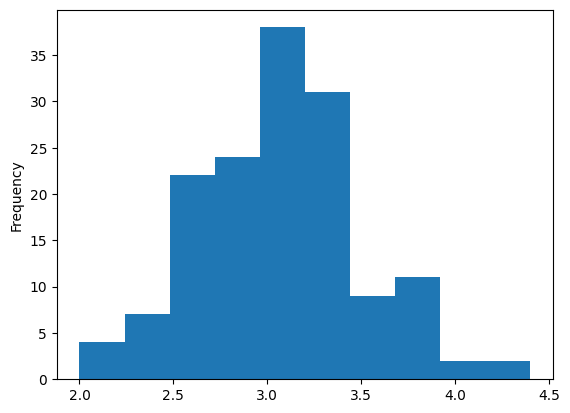

In [55]:
# Histogram plot

df['SepalWidthCm'].plot(kind='hist')

<Axes: ylabel='Density'>

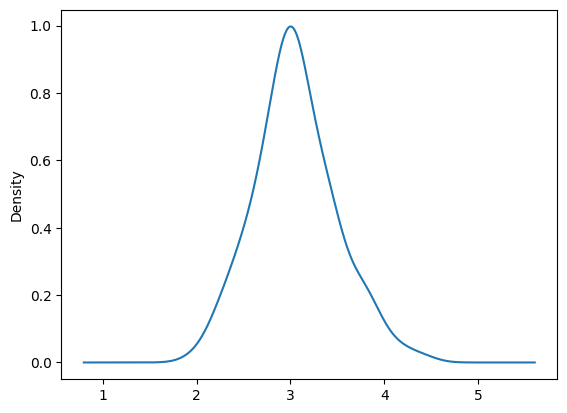

In [60]:
# kde plot

df['SepalWidthCm'].plot(kind='kde')

<Axes: >

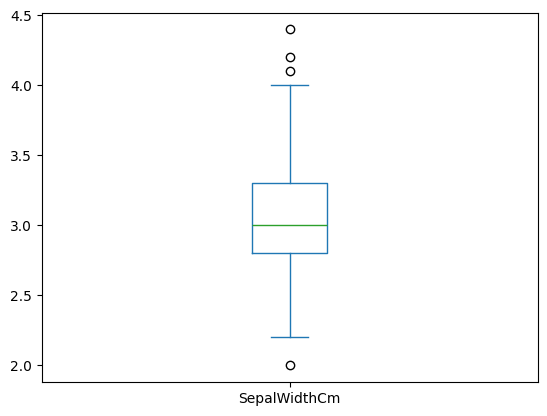

In [57]:
# box plot

df['SepalWidthCm'].plot(kind='box')

<Axes: xlabel='Species'>

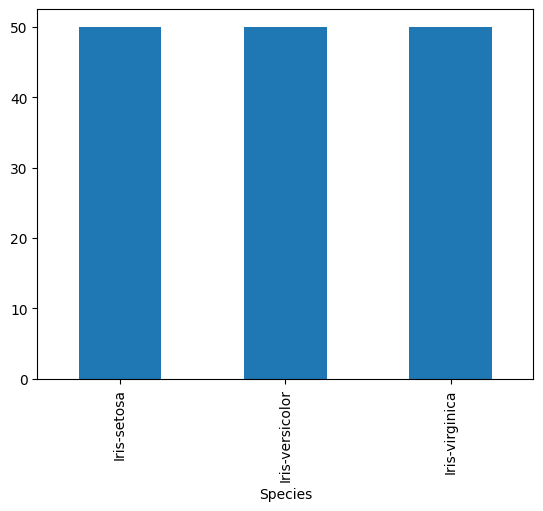

In [58]:
# Vertical bar plot

df['Species'].value_counts().plot(kind='bar')

<Axes: ylabel='SepalWidthCm'>

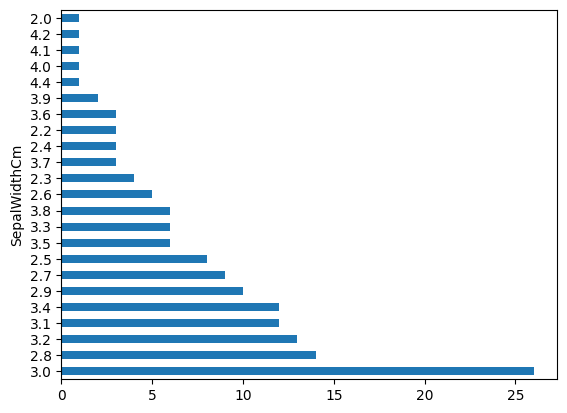

In [59]:
# Horizontal bar plot

df['SepalWidthCm'].value_counts().plot(kind='barh')

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

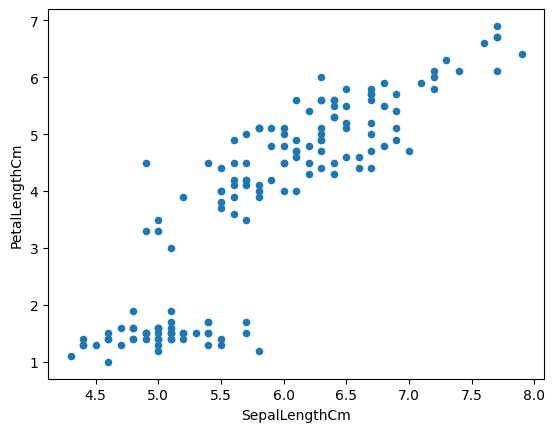

In [62]:
# Scatter plot of two columns on x and y axis

df.plot(x = 'SepalLengthCm', y = 'PetalLengthCm', kind ='scatter')